# Práctica 1.4: Umbralización
Equipo:
1. Miguel Ángel Sanchez Zanjuampa
2. Navil Pineda Rugerio

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Imagen original y creacion de hist

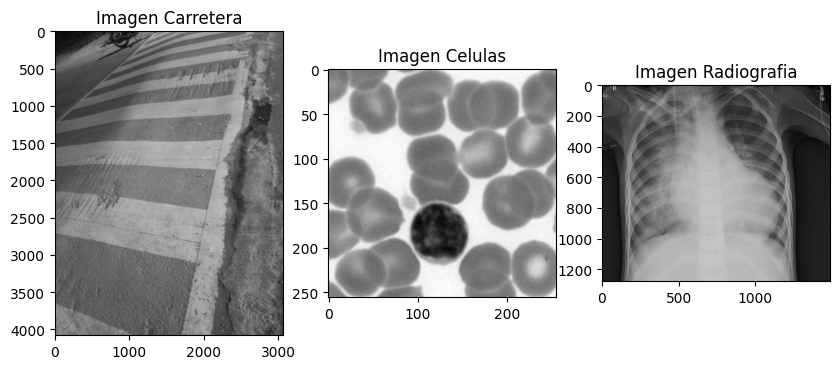

In [17]:
image = cv2.imread('../../IMAGES/20230113_20_57_12_575_000_zGaC6yksz9cwl3UOetH2K4URrOs2_F_4080_3060.jpg', 0)
img1 = np.copy(image)
image = cv2.imread('../../IMAGES/image-cell.png', 0)
img2 = np.copy(image)
image = cv2.imread('../../IMAGES/person_bacteria.jpeg', 0)
img3 = np.copy(image)

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(img1,  cmap='gray')
ax[0].title.set_text('Imagen Carretera')
ax[1].imshow(img2,  cmap='gray')
ax[1].title.set_text('Imagen Celulas')
ax[2].imshow(img3,  cmap='gray')
ax[2].title.set_text('Imagen Radiografia')

# Técnica de: Umbralización global

(-0.5, 3059.5, 4079.5, -0.5)

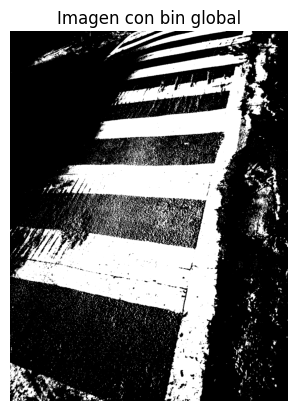

In [18]:
def glob(img,valor):
    
    forma = np.shape(img)
    base = np.zeros(forma)
    
    alto, ancho = forma
    
    for i in range(alto):
        for j in range(ancho):
            if(img[i][j] <= valor):
                base[i][j] = 0
            else:
                base[i][j] = 1
    
    return base

bin1 = glob(img1,128)

plt.imshow(bin1, cmap='gray')
plt.title('Imagen con bin global')
plt.axis('off')

# Técnica de: Umbralización global por el método de Otsu

(-0.5, 3059.5, 4079.5, -0.5)

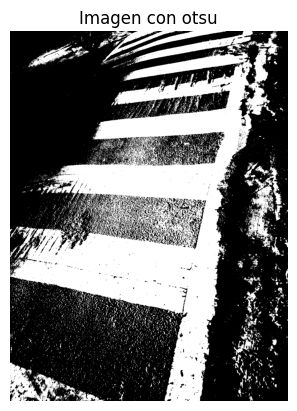

In [19]:
def otsu(img):
    
    alto, ancho = np.shape(img)

    hist = np.zeros(256)

    for x in range(alto):
        for y in range(ancho):
            intensidad = img[x, y]
            hist[intensidad] += 1


    hist = hist / (ancho * alto)
    
    var = 0
    umbral = 0

    # Buscar el valor optimo dentro de todos los rangos ([1,2],[2,3],[3,4]...)
    for T in range(1, 256):
        
        # Calcular pesos de background y foreground
        # fondo
        w1 = np.sum(hist[:T])    
        # frente
        w2 = np.sum(hist[T:])    
        
        # En los limites el valor es 0, por lo que no se toma en cuenta
        if w1 == 0 or w2 == 0:
            continue
        
        # Calcular medias de bg y fg
        # bg
        x1 = np.sum(np.arange(T) * hist[:T]) / w1
        # fg
        x2 = np.sum(np.arange(T, 256) * hist[T:]) / w2
        
        # Varianza entre bg y fg
        varianza = w1 * w2 * ((x1 - x2) ** 2)
        if varianza > var:
            var = varianza
            umbral = T
            
    # Aplicar el T (umbral) óptimo
    resultado = (img > umbral) * 255

    return resultado

bin2 = otsu(img1)
plt.imshow(bin2, cmap='gray')
plt.title('Imagen con otsu')
plt.axis('off')

# Técnica de: Umbralización local adaptativa por el método de Bernsen

In [20]:
# Metodo de Bernsen
def bernsen_thresolding(image, k):
    wid, hght = image.shape
    newImage = np.copy(image)

    # Radio de la vecindad
    radius = k//2

    for i in range(radius+1, wid-radius):
        for j in range(radius+1, hght-radius):
            # Definir vecindad
            nb = image[i-radius:i+radius+1,j-radius:j+radius+1]

            # Obtener el maximo y minimo de la vecindad
            minNb = np.min(nb)
            maxNb = np.max(nb)
            
            # Valor de umbral
            tValue = (minNb + maxNb) / 2

            # Diferencia de contraste mayor en la vecindad
            difC = maxNb - minNb

            # Definir si el contraste es menor al minimo pasado como parametro
            if (difC < k):
                nClass = 255 # La vecindad completa es una clase
            else:
                nClass = tValue
            
            # Umbralizar el pixel
            if(image[i,j] < nClass):
                newImage[i,j] = 255
            else:
                newImage[i,j] = 0
    return newImage

C:\Users\HP\AppData\Local\Temp\ipykernel_6064\827412529.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  tValue = (minNb + maxNb) / 2


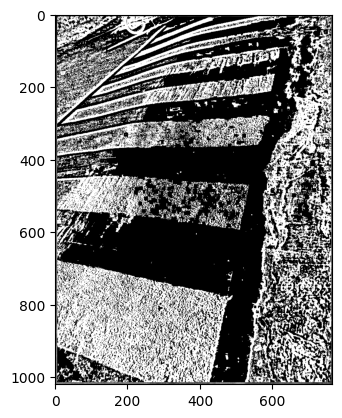

In [21]:
img1 = cv2.resize(img1,(765, 1020), interpolation = cv2.INTER_LINEAR) # Resize de la imagen para mayor velocidad
imgBernsen1 = bernsen_thresolding(img1, 10)
plt.imshow(imgBernsen1, cmap='gray')

# Aplicar los 3 métodos a las 3 imagenes

In [31]:
img1 = cv2.resize(img1,(765, 1020), interpolation = cv2.INTER_LINEAR) # Resize de la imagen para mayor velocidad
global1 = glob(img1,128)
global2 = glob(img2,128)
global3 = glob(img3,128)

In [24]:
otsu1 = otsu(img1)
otsu2 = otsu(img2)
otsu3 = otsu(img3)

In [25]:
imgBernsen2 = bernsen_thresolding(img2, 8)
imgBernsen3 = bernsen_thresolding(img3, 15)

C:\Users\HP\AppData\Local\Temp\ipykernel_6064\827412529.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  tValue = (minNb + maxNb) / 2


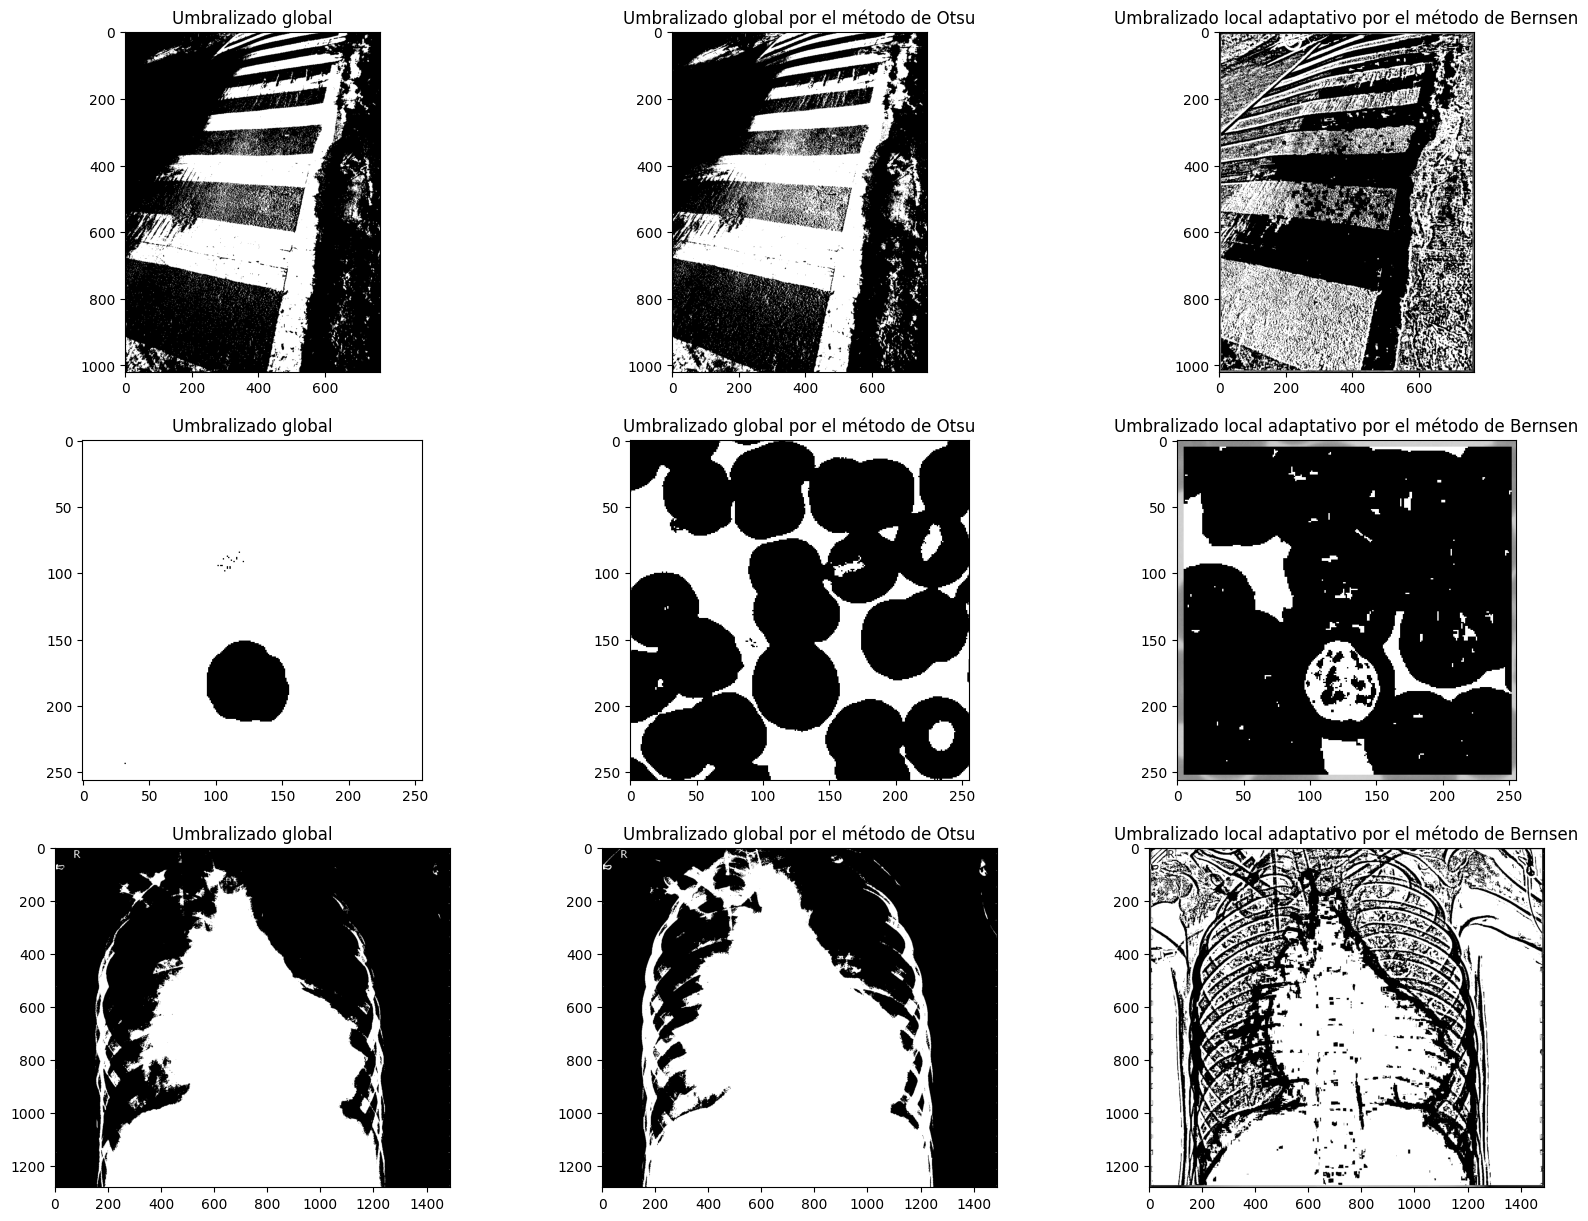

In [32]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
ax[0,0].imshow(global1, cmap='gray')
ax[0,0].title.set_text('Umbralizado global')

ax[0,1].imshow(otsu1, cmap='gray')
ax[0,1].title.set_text('Umbralizado global por el método de Otsu')

ax[0,2].imshow(imgBernsen1, cmap='gray')
ax[0,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')


ax[1,0].imshow(global2, cmap='gray')
ax[1,0].title.set_text('Umbralizado global')

ax[1,1].imshow(otsu2, cmap='gray')
ax[1,1].title.set_text('Umbralizado global por el método de Otsu')

ax[1,2].imshow(imgBernsen2, cmap='gray')
ax[1,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')


ax[2,0].imshow(global3, cmap='gray')
ax[2,0].title.set_text('Umbralizado global')

ax[2,1].imshow(otsu3, cmap='gray')
ax[2,1].title.set_text('Umbralizado global por el método de Otsu')

ax[2,2].imshow(imgBernsen3, cmap='gray')
ax[2,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')